In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# load data
df = pd.read_parquet('2_after_feature_extraction/feature_matrix_media.parquet')

In [11]:
# keep only css features
df_fp = df.drop(columns=['session_id'])
df_fp = df_fp[df_fp.columns[df_fp.columns.str.contains('css:')]]

# remove user agent from the mix
df_fp = df_fp[df_fp.columns[~df_fp.columns.str.contains('User-Agent')]]

In [12]:
# Convert each row to tuple so we can count duplicates
fingerprint_hashes = df_fp.apply(lambda row: tuple(row), axis=1)

In [13]:
# Count unique vs duplicates
total = len(fingerprint_hashes)
unique = fingerprint_hashes.nunique()
duplicates = total - unique
collision_rate = duplicates / total

In [14]:
print(f"All features:")
print(f"- Total fingerprints: {total}")
print(f"- Unique fingerprints: {unique}")
print(f"- Collision rate: {collision_rate:.4f} ({duplicates} collisions)")

All features:
- Total fingerprints: 918
- Unique fingerprints: 218
- Collision rate: 0.7625 (700 collisions)


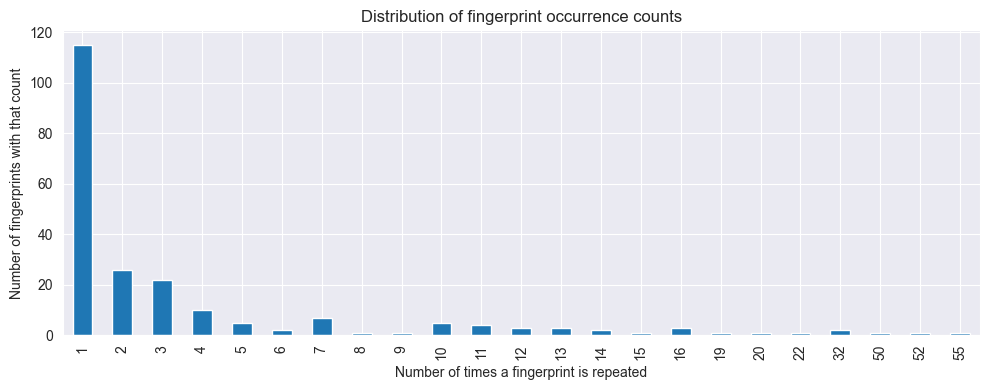

In [15]:
fp_counts = fingerprint_hashes.value_counts()
plt.figure(figsize=(10, 4))
fp_counts.value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of fingerprint occurrence counts")
plt.xlabel("Number of times a fingerprint is repeated")
plt.ylabel("Number of fingerprints with that count")
plt.tight_layout()
plt.show()

In [16]:
# check which session_ids have the same fingerprint
df['fingerprint'] = fingerprint_hashes

duplicate_groups = df.groupby('fingerprint')['session_id'].apply(list)

duplicate_groups = duplicate_groups[duplicate_groups.apply(len) > 1]

print(f"Found {len(duplicate_groups)} duplicate fingerprints:")
for i, (fp, sessions) in enumerate(duplicate_groups.items(), 1):
    print(f"\nDuplicate Group {i}:")
    print(f"- Fingerprint: {fp}")
    print(f"- Session IDs: {sessions}")

Found 103 duplicate fingerprints:

Duplicate Group 1:
- Fingerprint: ('', 136, 195, 166, 711, 175, 1100, 123, 6755, 125, 84, 130, 78, 188, 403, 110, 133, 100, 600, 164, 182, 123, 554, 78, 587, 115, 678, '', 1, 32, 3, 17, 128, 0, 68, 20, 1, 8, 5, '1', '', 8, 12.0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, '000000010000000')
- Session IDs: ['2d551041-a7cd-4163-a031-280978131144', '44749996-2df8-44a7-a725-125a7ac251e8', '60c6abc2-d4a7-438e-ae96-61272fc674d6', 'b9dd64aa-7be0-40e3-b6d1-802687b9e6d4']

Duplicate Group 2:
- Fingerprint: ('', 136, 195, 166, 711, 175, 1100, 123, 6755, 125, 84, 130, 78, 188, 403, 110, 133, 100, 600, 164, 182, 123, 554, 78, 587, 115, 678, '0', 1, 32, 3, 17, 128, 32, 68, 20, 1, 8, 5, '1', '', 8, 12.0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, '000000010000000')
- Session IDs: ['0a80f532-afbb-40a2-ac3a-e911b5094277', '42be05da-583f-4694-b544-a5bf8e780a95', '63d6e14e-e758-4051-85d5-31e4d6a70bf9', '67d358f5-5c06-451a-b6c8-985f8d38e788', '95330296-77fe-4923-b3f6